#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [697]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (3).csv


#EDA

In [699]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [700]:
data.shape

(50, 5)

In [701]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [702]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [703]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [704]:
data.duplicated().sum()

0

In [705]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [706]:
len(data['Unnamed: 0'].unique())

50

In [707]:
data1=data.drop('Unnamed: 0', axis=1)
data1.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [708]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data1)

In [709]:
scaled_data=pd.DataFrame(scaled_data)

In [710]:
scaled_data.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [711]:
scaled_data.rename(columns={0:'Murder',1:'Assault',2:'UrbanPop',3:'Rape'}, inplace=True)

In [712]:
scaled_data.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240


In [713]:
scaled_data.dtypes

Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

#Hierarchical Clustering

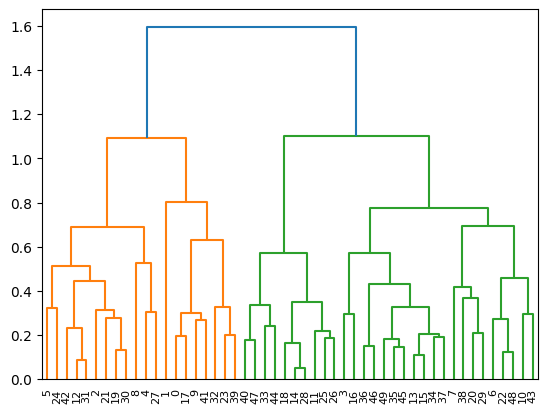

In [714]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram=sch.dendrogram(sch.linkage(scaled_data, method='complete'))        # complete linkage was found to be best for given data based on dendrogram

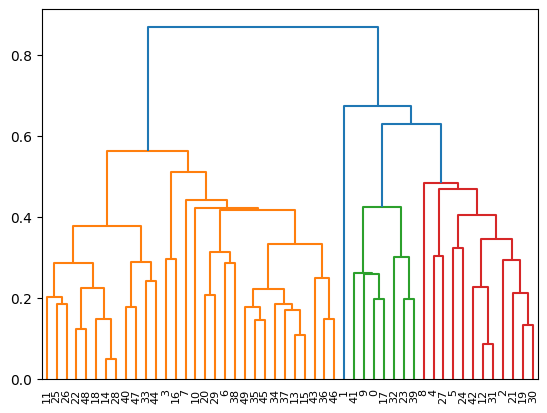

In [715]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data, method='average'))

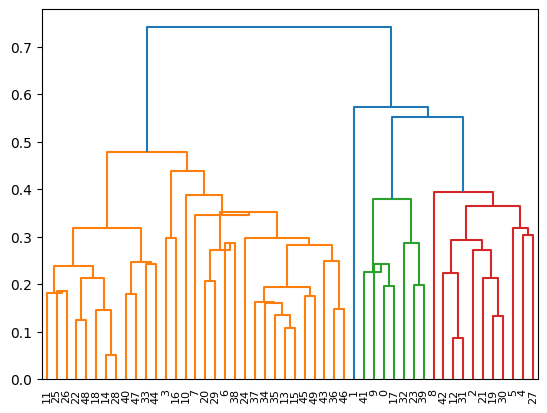

In [716]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data, method='centroid'))

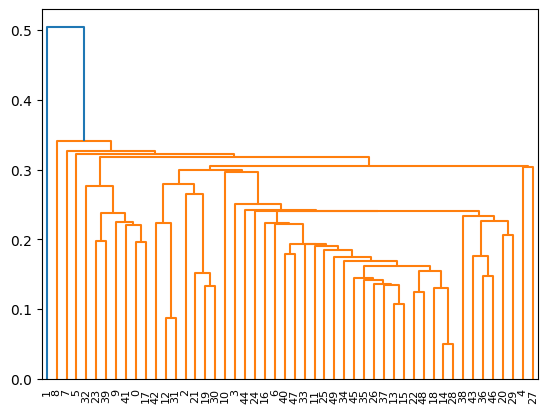

In [717]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data, method='single'))

In [718]:
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')
y_hc =hc.fit_predict(scaled_data)
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [719]:
data['cluster_id']=y_hc
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [720]:
len(data[data['cluster_id']==4])

1

In [721]:
len(data[data['cluster_id']==3])

7

In [722]:
len(data[data['cluster_id']==2])

10

In [723]:
len(data[data['cluster_id']==1])

12

In [724]:
len(data[data['cluster_id']==0])

20

In [725]:
# when number of clusters = 3
hc3=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
y_hc3=hc3.fit_predict(scaled_data)
y_hc3

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [726]:
data['id_num_clusters3'] =y_hc3
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,id_num_clusters3
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0


In [727]:
len(data[data['id_num_clusters3']==0])

20

In [728]:
len(data[data['id_num_clusters3']==1])

20

In [729]:
len(data[data['id_num_clusters3']==2])

10

In [730]:
scaled_data['id_num_clusters3'] = y_hc3
scaled_data.head(2)

,Murder,Assault,UrbanPop,Rape,id_num_clusters3
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0


In [731]:
scaled_data['id_num_clusters3'].unique()

array([0, 1, 2])

In [732]:
# getting aggregate mean of each cluster
data.iloc[:, 1:5].groupby(data.id_num_clusters3).mean()

,Murder,Assault,UrbanPop,Rape
id_num_clusters3,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


#K-Means

In [733]:
from sklearn.cluster import KMeans
scaled_data.head()

,Murder,Assault,UrbanPop,Rape,id_num_clusters3
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [734]:
scaled_data.drop(columns=['id_num_clusters3'], inplace=True)

In [735]:
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


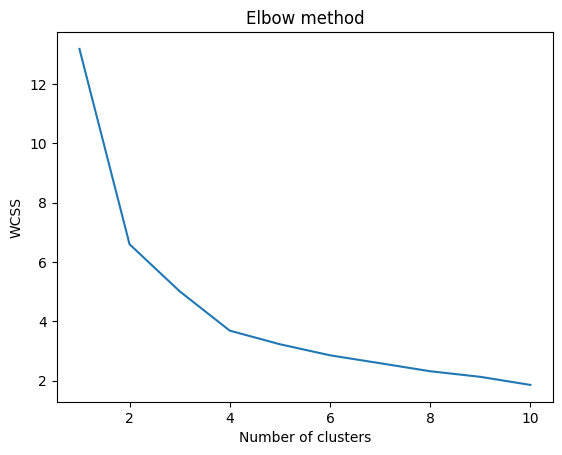

In [736]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(scaled_data)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();


In [737]:
# number of clusters = 2 would be optimal for the given data based on Elbow plot
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_data)


KMeans(n_clusters=2, random_state=0)

In [738]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [739]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,id_num_clusters3
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0


In [740]:
data.drop(['cluster_id','id_num_clusters3'], axis=1, inplace=True)

In [741]:
data.head(1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2


In [ ]:
data['cluster_id']=kmeans.labels_

In [743]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [744]:
data.groupby('cluster_id').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster_id,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [745]:
len(data[data['cluster_id']==0])

30

In [746]:
len(data[data['cluster_id']==1])

20

In [747]:
kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

#DBSCAN

In [748]:
from sklearn.cluster import DBSCAN
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (4).csv


In [749]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [750]:
data1=data.drop('Unnamed: 0', axis=1)

In [751]:
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [752]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_df=scaler.fit_transform(data1)

In [753]:
new_df[:10,:]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618]])

In [754]:
dbscan=DBSCAN(eps=5, min_samples=5)
dbscan.fit(new_df)

DBSCAN(eps=5)

In [755]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [756]:
len(dbscan.labels_)

50

In [757]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [758]:
data['cluster']=dbscan.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [759]:
len(data[data.cluster==-1])

0

In [760]:
data['cluster'].value_counts()

0    50
Name: cluster, dtype: int64

In [761]:
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [762]:
dbscan1=DBSCAN(eps=45, min_samples=10)
dbscan1.fit(data1)

DBSCAN(eps=45, min_samples=10)

In [763]:
dbscan1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [764]:
y_pred1=dbscan1.fit_predict(data1)
y_pred1

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [765]:
data1['clusterid']=dbscan1.labels_

In [766]:
len(data[data1['clusterid']==-1])

2

In [767]:
(len(data1[data1['clusterid']==-1])/len(data1))*100

4.0

In [768]:
data1.head()

,Murder,Assault,UrbanPop,Rape,clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [769]:
from sklearn.metrics import silhouette_score
X= silhouette_score(data1.iloc[:, :-1],dbscan1.labels_)
X

0.3476862437684531

In [770]:
y_pred=dbscan.fit_predict(new_df)      # normalized data
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [771]:
y_pred1=dbscan1.fit_predict(data1)   # without normalization
y_pred1

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

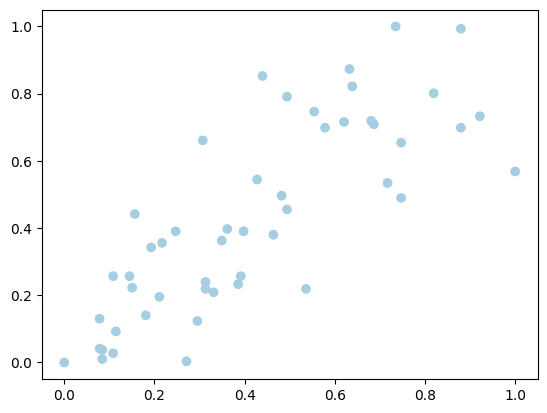

In [772]:
plt.scatter(new_df[:,0],new_df[:,1],c=y_pred, cmap='Paired') # with normalization

In [773]:
data1=data1.values


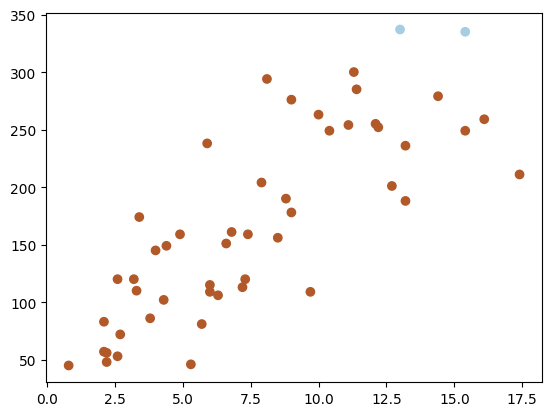

In [774]:
plt.scatter(data1[:,0],data1[:,1],c=y_pred1, cmap='Paired')      #without normalization

In [775]:
# when the data was scaled , all the datapoints belonged to a same cluster of '0' with all combination of eps and min_samples, which indicates that the datapoints are sufficiently close to each other and none of the datapoint
#was classified as an error

# when the data without normalization was used with lesser eps value, most of the datapoints were classified to -1(misclassification) . Only when the eps was increased very high we could get most datapoints clustered to '0'

# Inference : for the given data most optimal number of clusters was found to be 2 from dendrogram and also Elbow plot and the data didnt show a density based clusters.

#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
#Draw the inferences from the clusters obtained.


In [776]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [777]:
data=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

#EDA

In [778]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [779]:
data.shape

(3999, 12)

In [780]:
data['ID#']=data['ID#'].astype(str)

In [781]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [782]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID#                3999 non-null   object
 1   Balance            3999 non-null   int64 
 2   Qual_miles         3999 non-null   int64 
 3   cc1_miles          3999 non-null   int64 
 4   cc2_miles          3999 non-null   int64 
 5   cc3_miles          3999 non-null   int64 
 6   Bonus_miles        3999 non-null   int64 
 7   Bonus_trans        3999 non-null   int64 
 8   Flight_miles_12mo  3999 non-null   int64 
 9   Flight_trans_12    3999 non-null   int64 
 10  Days_since_enroll  3999 non-null   int64 
 11  Award?             3999 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 375.0+ KB


In [783]:
data['ID#'].duplicated().sum()

0

In [784]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [785]:
data.duplicated().sum()

0

In [786]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [787]:
len(data.Balance.unique())

3904

In [788]:
data.Balance.duplicated().sum()

95

In [789]:
len(data['Qual_miles'].unique())

164

In [790]:
len(data['cc1_miles'].unique())

5

In [791]:
data['cc1_miles'].unique()

array([1, 4, 3, 2, 5])

In [792]:
len(data[data['cc1_miles']==1])

2289

In [793]:
len(data[data['cc1_miles']==2])

284

In [794]:
len(data[data['cc1_miles']==3])

613

In [795]:
len(data[data['cc1_miles']==4])

525

In [796]:
len(data[data['cc1_miles']==5])

288

In [797]:
len(data['cc2_miles'].unique())

3

In [798]:
data['cc2_miles'].unique()

array([1, 2, 3])

In [799]:
len(data['cc3_miles'].unique())

5

In [800]:
data['cc3_miles'].unique()

array([1, 3, 2, 4, 5])

In [801]:
len(data['Bonus_miles'].unique())

2734

In [802]:
len(data['Bonus_trans'].unique())

57

In [803]:
len(data['Flight_miles_12mo'].unique())

343

In [804]:
len(data['Flight_trans_12'].unique())

35

In [805]:
data['Flight_trans_12'].unique()


array([ 0,  4,  1, 12,  3,  2,  9, 11,  5,  7, 29,  8, 16, 10, 14,  6, 23,
       17, 18, 13, 15, 25, 28, 20, 26, 27, 19, 36, 45, 24, 31, 21, 53, 22,
       46])

In [806]:
len(data['Days_since_enroll'].unique())

2820

In [807]:
data['Award?'].unique()

array([0, 1])

In [808]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

<Axes: xlabel='cc1_miles'>

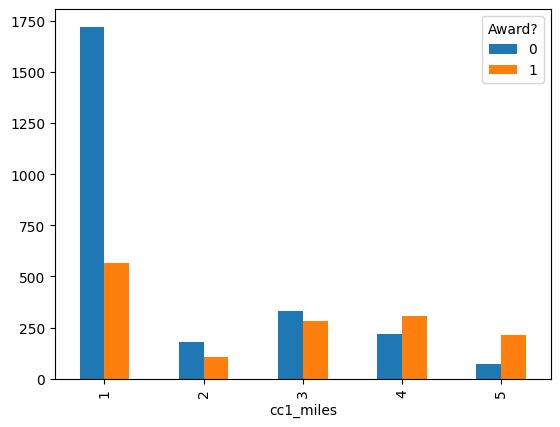

In [809]:
pd.crosstab(data['cc1_miles'], data['Award?']).plot(kind='bar')

<Axes: xlabel='cc2_miles'>

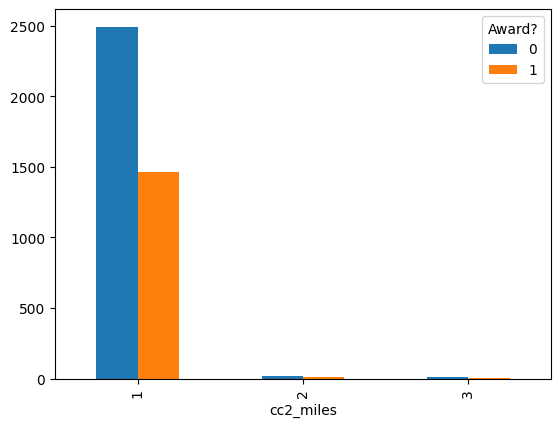

In [810]:
pd.crosstab(data['cc2_miles'], data['Award?']).plot(kind='bar')

<Axes: xlabel='cc3_miles'>

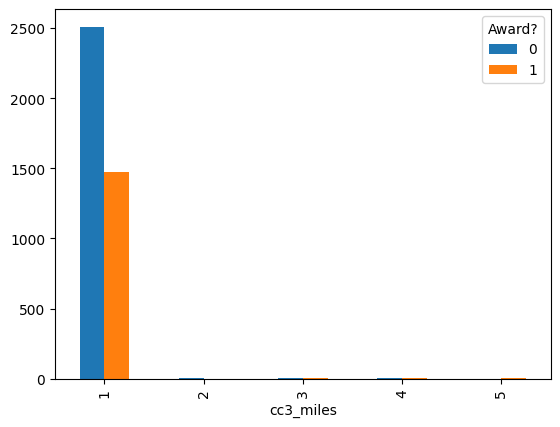

In [811]:
pd.crosstab(data['cc3_miles'], data['Award?']).plot(kind='bar')

In [812]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


<Axes: ylabel='cc1_miles'>

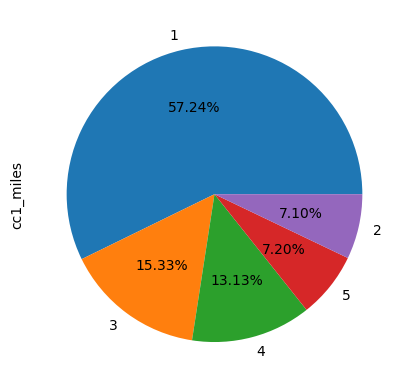

In [813]:
data['cc1_miles'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [814]:
data['cc1_miles'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

In [815]:
data['Award?'].value_counts()

0    2518
1    1481
Name: Award?, dtype: int64

In [816]:
data['Award?'].dtypes

dtype('int64')

In [817]:
data1=data.copy()

In [818]:
scaled_data=data1.drop(['ID#','Award?'], axis=1)

In [819]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000


In [820]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(scaled_data)

In [821]:
scaled_data=pd.DataFrame(scaled_data)

In [822]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


In [823]:
scaled_data['Award']=data['Award?']

In [824]:
scaled_data.head(1)

,0,1,2,3,4,5,6,7,8,9,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0


In [825]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [826]:
scaled_data=scaled_data.rename(columns={0:'Balance',1:'Qual_miles',2:'cc1_miles',3: 'cc2_miles',4: 'cc3_miles',5: 'Bonus_miles',6:'Bonus_trans',7:'Flight_miles_12mo',8:'Flight_trans_12',9:'Days_since_enroll'})

In [827]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0


#Building Model : Hierarchical Clustering

In [828]:
#using complete linkage technique


In [829]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [830]:
y_hc=hc.fit_predict(scaled_data)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [831]:
scaled_data['clusterid']=y_hc

In [832]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0


In [833]:
scaled_data['clusterid'].unique()

array([0, 2, 1])

In [834]:
len(scaled_data[scaled_data['clusterid']==0])

3980

In [835]:
len(scaled_data[scaled_data['clusterid']==1])

4

In [836]:
len(scaled_data[scaled_data['clusterid']==2])

15

In [837]:
# inference : By using complete method, most data points clustered together which indicates most of the datapoints are similar to each other

In [838]:
# using ward method

In [839]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [840]:
scaled_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1,0
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1,0
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1,0
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0,0


In [841]:
scaled_data.iloc[:, :-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,0


In [842]:
y_hw=hc.fit_predict(scaled_data.iloc[:,:-1])
y_hw

array([0, 0, 0, ..., 1, 0, 0])

In [843]:
len(y_hw)

3999

In [844]:
scaled_data['clusterid_w']=y_hw

In [845]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid,clusterid_w
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0,0


In [846]:
scaled_data['clusterid_w'].unique()

array([0, 1, 2])

In [847]:
len(scaled_data[scaled_data['clusterid_w']==0])

2003

In [848]:
len(scaled_data[scaled_data['clusterid_w']==1])

1765

In [849]:
len(scaled_data[scaled_data['clusterid']==2])

15

In [850]:
#the ward method method was found to be useful in clustering the data


In [851]:
scaled_data.drop('clusterid', axis=1, inplace=True)

In [852]:
scaled_data.groupby(['clusterid_w']).agg(['mean'])    # based on clusters formed using ward method

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_w,,,,,,,,,,,
0,-0.367764,-0.180606,-0.745282,0.097899,-0.062767,-0.578637,-0.623978,-0.210254,-0.218949,-0.160252,0.203195
1,0.360196,0.154653,0.837033,-0.098242,0.079445,0.603414,0.539492,-0.139746,-0.144066,0.185059,0.512748
2,0.436734,0.384381,0.066824,-0.098242,-0.062767,0.406853,1.288413,2.890867,2.999270,-0.024437,0.731602


In [853]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [854]:
data['clusterid']=y_hw

In [855]:
data.head(1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0


In [856]:
len(data[(data['Award?']==1) & (data['clusterid']==0)])

407

In [857]:
len(data[(data['Award?']==1) & (data['clusterid']==1)])

905

In [858]:
len(data[(data['Award?']==1) & (data['clusterid']==2)])

169

In [859]:
data.groupby(['clusterid']).agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid,,,,,,,,,,,,
0,inf,36544.259111,4.403395,1.033450,1.028957,1.000000,3171.962057,5.610085,165.693460,0.543185,3787.659011,0.203195
1,inf,109895.813031,263.749008,3.211898,1.000000,1.027762,31716.057790,16.782436,264.406232,0.827195,4500.683853,0.512748
2,inf,117608.000000,441.458874,2.151515,1.000000,1.000000,26969.515152,23.974026,4507.367965,12.748918,4068.099567,0.731602


#K-MEANS

In [860]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid_w
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,1


In [861]:
scaled_data=scaled_data.drop('clusterid_w', axis=1)

In [862]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0


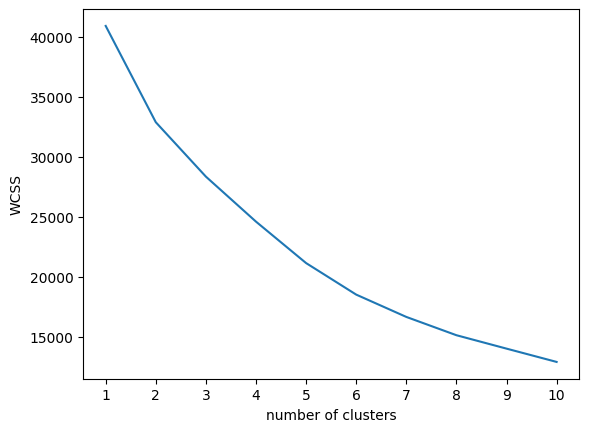

In [863]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, random_state=0)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, label='elbow plot')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.show();


In [864]:
# based on the Elbow plot optimal number of clusters are 2
km=KMeans(n_clusters=2, random_state=0)
km.fit_predict(scaled_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [865]:
y_k=km.labels_

In [866]:
scaled_data['y_k']=y_k
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_k
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,1


In [867]:
scaled_data['y_k'].unique()

array([0, 1], dtype=int32)

In [868]:
len(scaled_data[scaled_data['y_k']==0])

2790

In [869]:
len(scaled_data[scaled_data['y_k']==1])

1209

In [870]:
scaled_data.groupby(scaled_data['y_k']).agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
y_k,,,,,,,,,,,
0,-0.289832,-0.067027,-0.518871,0.023149,-0.060931,-0.472287,-0.413205,-0.167832,-0.186108,-0.191480,0.250896
1,0.668844,0.154678,1.197394,-0.053421,0.140609,1.089893,0.953551,0.387304,0.429480,0.441878,0.645988


In [871]:
data.head(1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0


In [872]:
data.drop('clusterid', axis=1, inplace=True)

In [873]:
data['y_k']=y_k

In [874]:
data.groupby(['y_k']).agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
y_k,,,,,,,,,,,,
0,inf,44396.929032,92.264516,1.345161,1.017921,1.000358,5740.083154,7.634050,225.085663,0.667742,3723.175986,0.250896
1,inf,140996.093466,263.768404,3.708023,1.006617,1.039702,43463.530190,20.758478,1002.294458,3.002481,5030.982630,0.645988


In [875]:
km.cluster_centers_

array([[-0.28997151, -0.06711261, -0.51852986,  0.02306199, -0.06093187,
        -0.47207339, -0.41164887, -0.16749917, -0.18585637, -0.1915275 ,
         0.25143266],
       [ 0.67075432,  0.15524309,  1.19944935, -0.05334639,  0.14094596,
         1.0919875 ,  0.95221512,  0.38745458,  0.42991798,  0.44303627,
         0.64540182]])

#DBSCAN

In [876]:
from sklearn.cluster import DBSCAN
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_k
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0


In [877]:
scaled_data.drop('y_k', axis=1, inplace=True)

In [878]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0


In [879]:
dbscan=DBSCAN(eps=5, min_samples=12)      # min_samples should be greater than (number of features + 1)
dbscan.fit_predict(scaled_data)

array([0, 0, 0, ..., 0, 0, 0])

In [880]:
y_d=dbscan.labels_

In [881]:
len(y_d)

3999

In [882]:
scaled_data['y_d']=y_d
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_d
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,0


In [883]:
scaled_data['y_d'].unique()

array([ 0,  2, -1,  1])

In [884]:
len(scaled_data[scaled_data['y_d']==0])

3930

In [885]:
len(scaled_data[scaled_data['y_d']==-1])

26

In [886]:
len(scaled_data[scaled_data['y_d']==1])

15

In [887]:
len(scaled_data[scaled_data['y_d']==2])

28

In [888]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_d
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,0


In [889]:
from sklearn.metrics import silhouette_score
X= silhouette_score(scaled_data.iloc[:, :-1],dbscan.labels_ )

In [890]:
X

0.5720174737361194

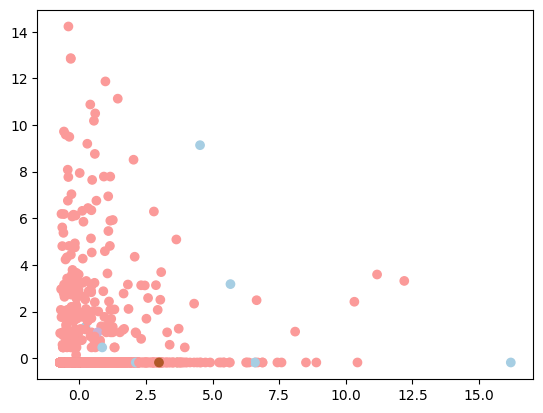

In [891]:
plt.scatter(scaled_data.iloc[:,0], scaled_data.iloc[:,1], c=y_d, cmap='Paired')


In [892]:
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_d
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,0


In [893]:
scaled_data.drop('y_d', axis=1, inplace=True)

# changing value for eps and min_samples

In [894]:
scaled_data.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0


In [895]:
dbscan2=DBSCAN(eps=12, min_samples=20)         # with different combinations of eps and min_samples the best combination was found to be eps=12 and min_samples with 20
dbscan2.fit_predict(scaled_data)
y_d2=dbscan2.labels_
Y=silhouette_score(scaled_data, y_d2)

In [896]:
Y

0.8644297359453785

In [897]:
scaled_data['y_d2'] =y_d2
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_d2
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,0,0
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,0,0
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,0,0
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,0,0
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1,0


In [898]:
scaled_data['y_d2'].unique()

array([ 0, -1])

In [899]:
len(scaled_data[scaled_data['y_d2']==0])

3998

In [900]:
len(scaled_data[scaled_data['y_d2']==-1])

1

In [901]:
scaled_data[scaled_data['y_d2']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,y_d2
3583,0.858575,0.460058,-0.769578,-0.098242,-0.062767,2.269723,7.747696,21.683004,13.612053,-1.329648,1,-1


In [902]:
data.loc[3583]

ID#                    3606
Balance              160114
Qual_miles              500
cc1_miles                 1
cc2_miles                 1
cc3_miles                 1
Bonus_miles           71954
Bonus_trans              86
Flight_miles_12mo     30817
Flight_trans_12          53
Days_since_enroll      1373
Award?                    1
y_k                       1
Name: 3583, dtype: object

In [903]:
scaled_data.loc[3583]

Balance               0.858575
Qual_miles            0.460058
cc1_miles            -0.769578
cc2_miles            -0.098242
cc3_miles            -0.062767
Bonus_miles           2.269723
Bonus_trans           7.747696
Flight_miles_12mo    21.683004
Flight_trans_12      13.612053
Days_since_enroll    -1.329648
Award                 1.000000
y_d2                 -1.000000
Name: 3583, dtype: float64

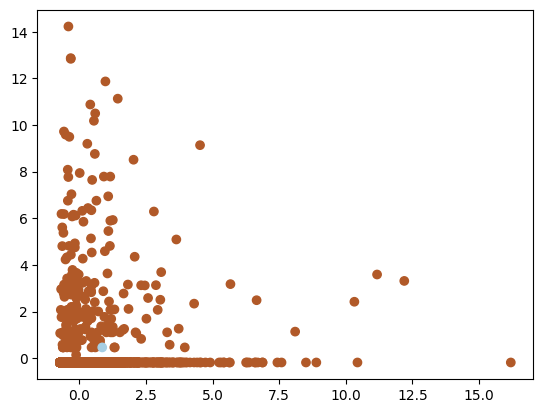

In [904]:
plt.scatter(scaled_data.iloc[:,0], scaled_data.iloc[:,1], c=dbscan2.labels_, cmap='Paired')

In [905]:
#inference
# clustering was performed by different methods like Hierarchical, K-Means and DBSCAN
#By using complete linkage method most datapoints were clustered together, but after using ward linkage method and num_clusters as 3 , datapoints were well clustered
#By using K-means, elbow plot was plotted and found '2' to be the optimal number of clusters and therebey data was clustered to 2
# by using dbscan method , various eps and min_samples were used and lastly eps value=12 and min_samples value=20 gave best silhoutte score of 86% and 1 outlier was found and the datapoint values were analyzed.